<a href="https://colab.research.google.com/github/Grace-1420/mock_analysis.py/blob/main/Copy_of_Notebooks_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from io import StringIO

data = StringIO("""
Customer ID,Age,Gender,Purchase Amount (USD),Product Category,Purchase Date,Country,Payment Method
C001,25,Female,120.50,Electronics,2024-11-01,USA,Credit Card
C002,31,Male,75.00,Books,2024-11-02,Canada,PayPal
C003,22,Female,300.20,Fashion,2024-11-03,USA,Debit Card
C004,40,Male,450.00,Electronics,2024-11-05,UK,Credit Card
C005,29,Female,99.99,Cosmetics,2024-11-06,Germany,PayPal
C006,35,Male,149.90,Fashion,2024-11-07,Canada,Credit Card
C007,27,Female,199.00,Electronics,2024-11-08,USA,PayPal
C008,42,Male,85.75,Books,2024-11-09,France,Debit Card
C009,30,Female,210.40,Fashion,2024-11-10,UK,Credit Card
C010,50,Male,400.00,Electronics,2024-11-11,USA,Debit Card
""")

df = pd.read_csv(data)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  # convert date
df = df.rename(columns={"Product Category" : "Category"})
# print (df)
# df['Gender'].value_counts().plot(kind='pie')
# plt.title('PIE CHART OF GENDER DISTRIBUTION')
# plt.savefig('PIE CHART OF GENDER DISTRIBUTION.png')
# plt.show

In [15]:
df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)

,Purchase Amount (USD)
Category,
Electronics,1169.50
Fashion,660.50
Books,160.75
Cosmetics,99.99


<function matplotlib.pyplot.show(close=None, block=None)>

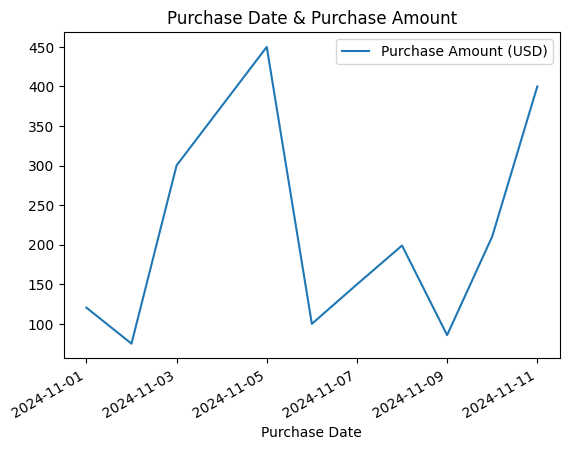

In [16]:
df.plot(x = 'Purchase Date', y = 'Purchase Amount (USD)', kind = 'line')
plt.title('Purchase Date & Purchase Amount')
plt.savefig('Purchase Date & Purchase Amount.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

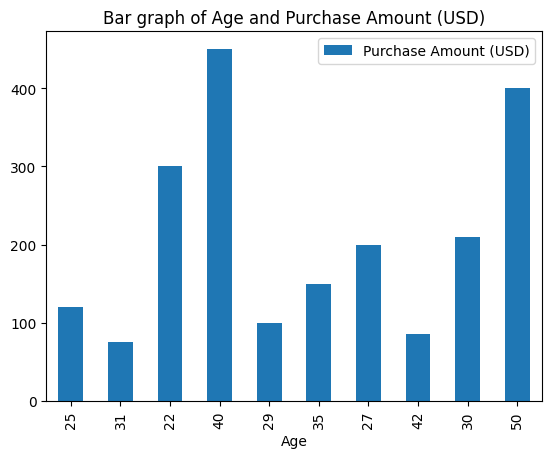

In [17]:
df.plot(x = 'Age', y = 'Purchase Amount (USD)', kind ='bar')
plt.title('Bar graph of Age and Purchase Amount (USD)')
plt.show

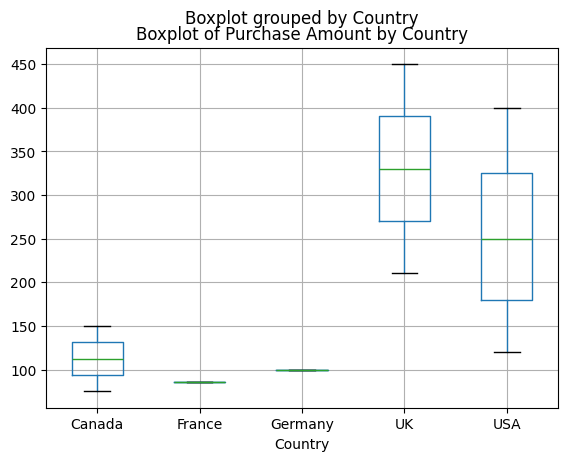

In [18]:
df.boxplot(column = 'Purchase Amount (USD)' , by = 'Country')
plt.title ('Boxplot of Purchase Amount by Country')
plt.show()

In [19]:
df['Category'].value_counts()

,count
Category,
Electronics,4
Fashion,3
Books,2
Cosmetics,1


In [21]:
pd.pivot_table(df,values = 'Purchase Amount (USD)' , index = 'Country' , columns = 'Category' , aggfunc = 'mean')

Category,Books,Cosmetics,Electronics,Fashion
Country,,,,
Canada,75.00,NaN,NaN,149.9
France,85.75,NaN,NaN,NaN
Germany,NaN,99.99,NaN,NaN
UK,NaN,NaN,450.000000,210.4
USA,NaN,NaN,239.833333,300.2


In [23]:
pd.pivot_table(df,values = 'Purchase Amount (USD)' , index = 'Country' , columns = 'Category' , aggfunc = 'count')

Category,Books,Cosmetics,Electronics,Fashion
Country,,,,
Canada,1.0,NaN,NaN,1.0
France,1.0,NaN,NaN,NaN
Germany,NaN,1.0,NaN,NaN
UK,NaN,NaN,1.0,1.0
USA,NaN,NaN,3.0,1.0


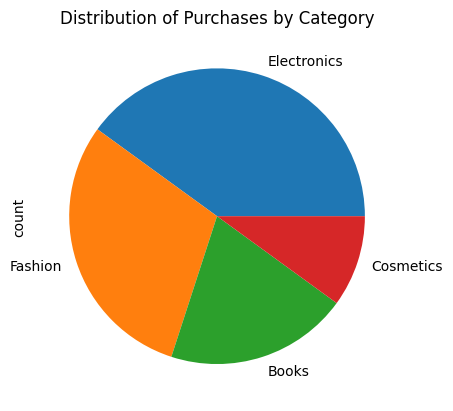

In [25]:
df['Category'].value_counts().plot(kind = 'pie')
plt.title('Distribution of Purchases by Category')
plt.savefig('Distribution of Purchase by Category.png')
plt.show()


In [26]:
df['Age'].mean()

np.float64(33.1)

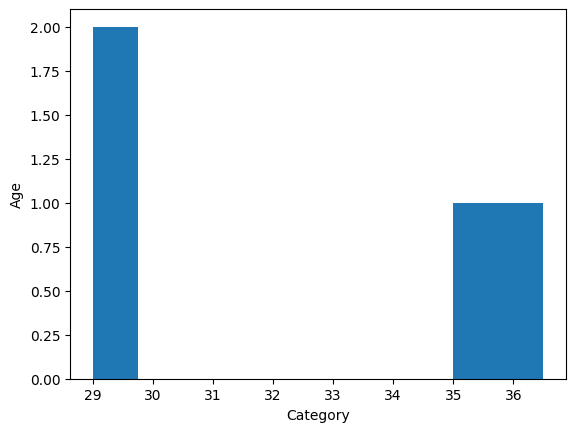

In [28]:
df.groupby('Category')['Age'].mean().plot(kind = 'hist')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()

In [30]:
df['Age'].sort_values(ascending = True)

,Age
2,22
0,25
6,27
4,29
8,30
1,31
5,35
3,40
7,42
9,50


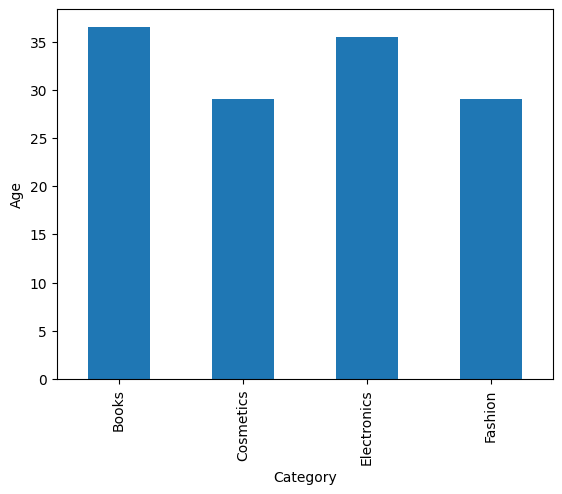

In [31]:
df.groupby('Category')['Age'].mean().plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()